In [45]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [46]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [47]:
data.index = pd.to_datetime(data.index)

In [48]:
data = data.dropna()
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [49]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [50]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_in.iloc[:,0]

In [51]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)  
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [26]:
model1 = sm.OLS(y_in, X_in).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        16:34:16   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529      0.000       1.540       5.410
Unemployment      0.5307      0.106      5.009      0.000       0.323       0.739
HousingStarts    -0.0005      0.000     -1.046      0.296      -0.001       0.000
Inflation         0.0077      0.004      2.173      0.030       0.001       0.015
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.849
Skew:                           1.039   Prob(JB):                     2.11e-27
Kurtosis:                       4.413   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from sklearn.metrics import mean_squared_error

in_pred = model1.fittedvalues
out_pred = model1.predict(X_out)

40.36082783566727

# 4.) Recreate the graph for your model

In [27]:
import matplotlib.pyplot as plt

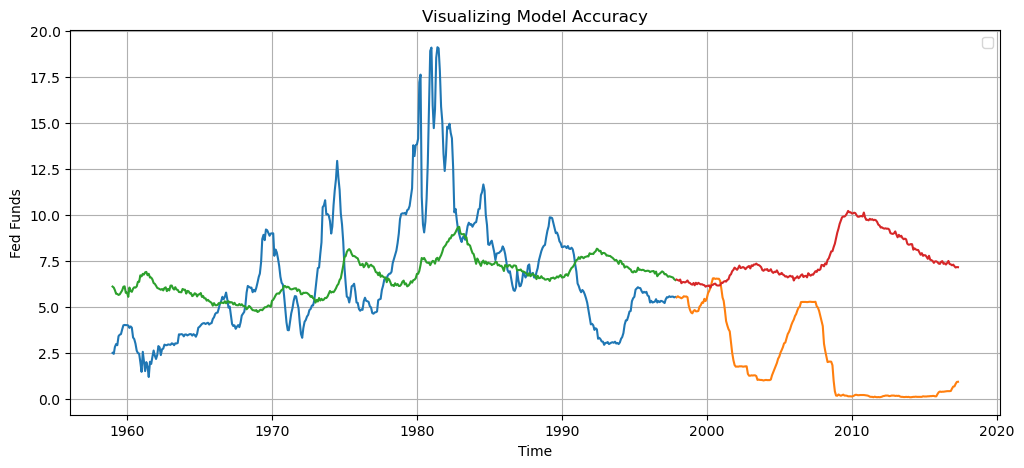

In [34]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(in_pred)
plt.plot(out_pred)
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
in_mse_1 = mean_squared_error(y_in, in_pred)
out_mse_1 = mean_squared_error(y_out, out_pred)

In [37]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566727


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [38]:
from sklearn.preprocessing import PolynomialFeatures

DEGREES:  1


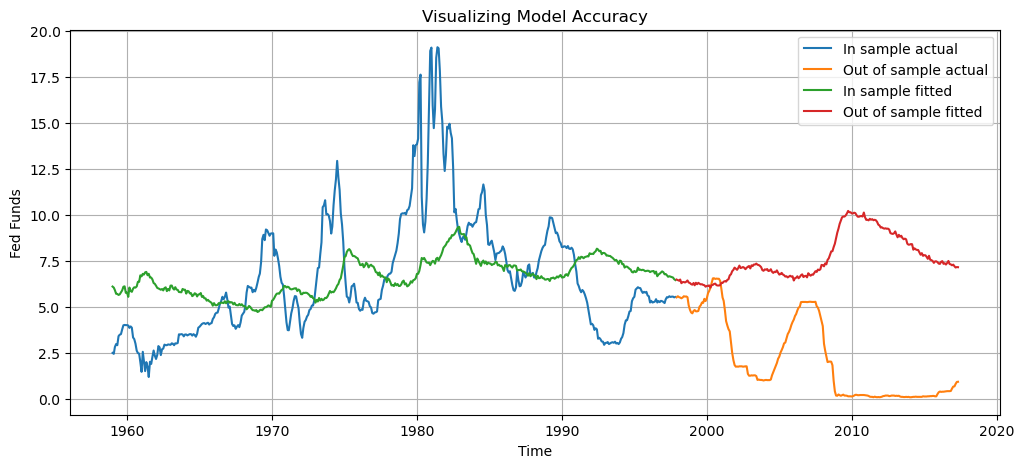

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566782
__________________________________________________
__________________________________________________
DEGREES:  2


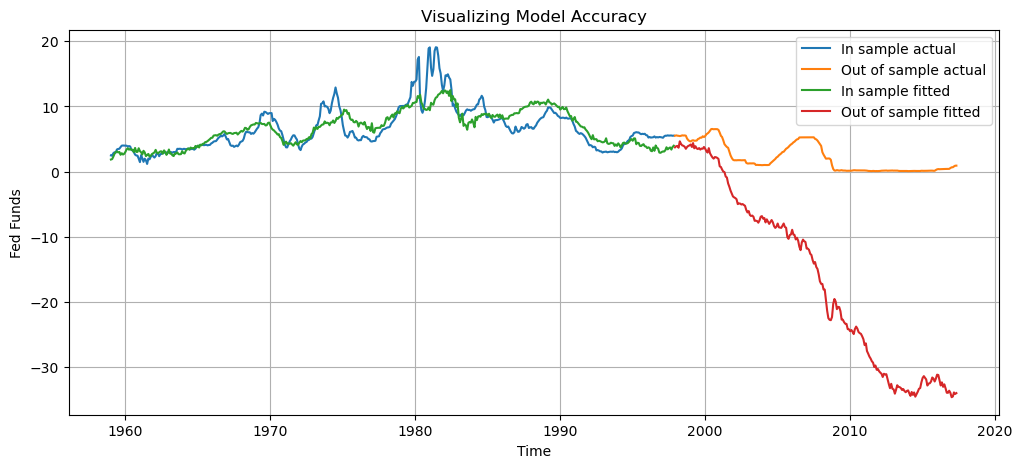

Insample MSE :  3.8634771392760685
Outsample MSE :  481.4465099294859
__________________________________________________
__________________________________________________
DEGREES:  3


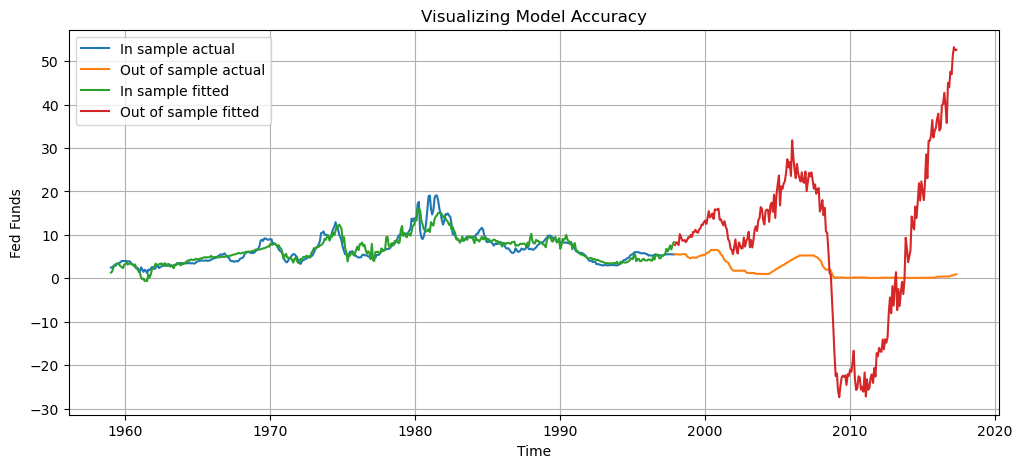

Insample MSE :  1.8723636266506438
Outsample MSE :  371.7680409381023
__________________________________________________
__________________________________________________


In [56]:
max_degrees = 3

for degrees in range(1, 1+max_degrees):
    print("DEGREES: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

    model1 = sm.OLS(y_in, X_in_poly).fit()
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In sample actual", "Out of sample actual", "In sample fitted", "Out of sample fitted"])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(y_in, in_preds)
    out_mse_1 = mean_squared_error(y_out, out_preds)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("__________________________________________________")
    print("__________________________________________________")

# 7.) State your observations :

Based from the results of (6), we can see that the in-sample MSE decreases as we increase the polynomial degree of the OLS model. However, the same does not necessarily translate to the out-sample MSE where we actually see that it has been higher when we make the model more complex.

In [57]:
git clone https://github.com/jefsuero/Machine-Learning-Project.git

SyntaxError: invalid syntax (3890831044.py, line 1)